In [5]:
import networkx as nx

# Creating a Graph 
G = nx.Graph() # Right now G is empty

# Add a node
G.add_node(1) 
G.add_nodes_from([2,3]) # You can also add a list of nodes by passing a list argument

# Add edges 
G.add_edge(1,2)

e = (2,3)
G.add_edge(*e) # * unpacks the tuple
G.add_edges_from([(1,2), (1,3)]) # Just like nodes we can add edges from a list

In [6]:
# subgraph(G, nbunch)      - induced subgraph view of G on nodes in nbunch
# union(G1,G2)             - graph union
# disjoint_union(G1,G2)    - graph union assuming all nodes are different
# cartesian_product(G1,G2) - return Cartesian product graph
# compose(G1,G2)           - combine graphs identifying nodes common to both
# complement(G)            - graph complement
# create_empty_copy(G)     - return an empty copy of the same graph class
# convert_to_undirected(G) - return an undirected representation of G
# convert_to_directed(G)   - return a directed representation of G

In [7]:
G.nodes()

NodeView((1, 2, 3))

In [8]:
G.edges()

EdgeView([(1, 2), (1, 3), (2, 3)])

In [9]:
G[1] # same as G.adj[1]

AtlasView({2: {}, 3: {}})

In [10]:
G[1][2]

{}

In [11]:
G.edges[1, 2]

{}

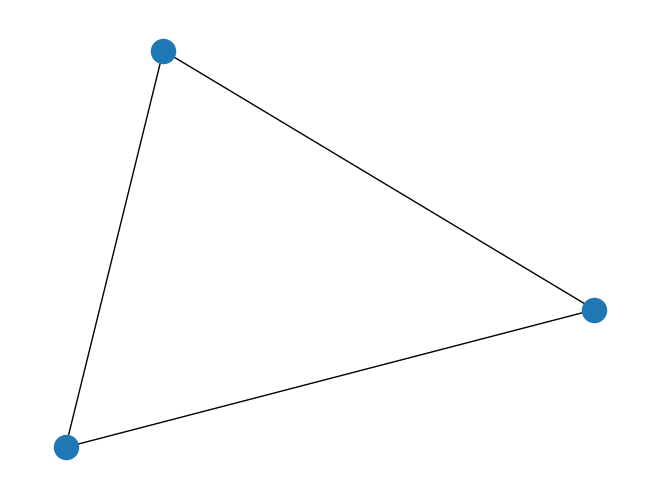

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
nx.draw(G)

In [13]:
! pip install pygraphviz

Defaulting to user installation because normal site-packages is not writeable

  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [48 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-3.9
      creating build\lib.win-amd64-3.9\pygraphviz
      copying pygraphviz\agraph.py -> build\lib.win-amd64-3.9\pygraphviz
      copying pygraphviz\graphviz.py -> build\lib.win-amd64-3.9\pygraphviz
      copying pygraphviz\scraper.py -> build\lib.win-amd64-3.9\pygraphviz
      copying pygraphviz\testing.py -> build\lib.win-amd64-3.9\pygraphviz
      copying pygraphviz\__init__.py -> build\lib.win-amd64-3.9\pygraphviz
      creating build\lib.win-amd64-3.9\pygraphviz\tests
      copying pygraphviz\tests\test_attribute_defaults.py -> build\lib.win-amd64-3.9\pygraphviz\tests
      copying pygraphviz\tests\test_clear.py -> build\lib.win-amd64-3.9\pygraphviz\tests
      copying pygraphviz\tests\test_close.py -> build\lib.wi


  Using cached pygraphviz-1.10.zip (120 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for pygraphviz
Failed to build pygraphviz
  Running setup.py install for pygraphviz: started
  Running setup.py install for pygraphviz: finished with status 'error'


In [16]:
! pip install --global-option=build_ext --global-option="-IC:\Program Files\Graphviz\include" --global-option="-LC:\Program Files\Graphviz\lib" pygraphviz

Defaulting to user installation because normal site-packages is not writeable

DEPRECATION: --no-binary currently disables reading from the cache of locally built wheels. In the future --no-binary will not influence the wheel cache. pip 23.1 will enforce this behaviour change. A possible replacement is to use the --no-cache-dir option. You can use the flag --use-feature=no-binary-enable-wheel-cache to test the upcoming behaviour. Discussion can be found at https://github.com/pypa/pip/issues/11453
  DEPRECATION: pygraphviz is being installed using the legacy 'setup.py install' method, because the '--no-binary' option was enabled for it and this currently disables local wheel building for projects that don't have a 'pyproject.toml' file. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/11451
  error: subprocess-exited-with-error
  
  × Running setup.py install for pygraphviz did not run successfully.
  │ exit code: 1
  ╰─> [3 lines of output]
   


  Using cached pygraphviz-1.10.zip (120 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py install for pygraphviz: started
  Running setup.py install for pygraphviz: finished with status 'error'


In [18]:
!pip install pygraphviz --config-settings="C:\Program Files\Graphviz\lib"


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

Arguments to --config-settings must be of the form KEY=VAL


In [ ]:
import pygraphviz as pgv
d={'1': {'2': None}, '2': {'1': None, '3': None}, '3': {'1': None}}
A = pgv.AGraph(data=d)
print(A) # This is the 'string' or simple representation of the Graph

In [ ]:
# Setting node attributes that are common for all nodes 
B.node_attr['style']='filled'
B.node_attr['shape']='circle'
B.node_attr['fixedsize']='true'
B.node_attr['fontcolor']='#FFFFFF'

# Creating and setting node attributes that vary for each node (using a for loop)
for i in range(16):
 B.add_edge(0,i)
 n=B.get_node(i)
 n.attr['fillcolor']="#%2x0000"%(i*16)
 n.attr['height']="%s"%(i/16.0+0.5)
 n.attr['width']="%s"%(i/16.0+0.5)
B.draw('star.png',prog="circo") # This creates a .png file in the local directory. Displayed below.

Image('images/star.png', width=650) # The Graph visualization we created above.

# Airline Dataset

In [19]:
import pandas as pd 
import numpy as np

data = pd.read_csv('Airlines.csv')

In [20]:
data.shape

(100, 16)

In [21]:
data.dtypes

year                int64
month               int64
day                 int64
dep_time          float64
sched_dep_time      int64
dep_delay         float64
arr_time          float64
sched_arr_time      int64
arr_delay         float64
carrier            object
flight              int64
tailnum            object
origin             object
dest               object
air_time          float64
distance            int64
dtype: object

In [22]:
# converting sched_dep_time to 'std' - Scheduled time of departure
data['std'] = data.sched_dep_time.astype(str).str.replace('(\d{2}$)', '') + ':' + data.sched_dep_time.astype(str).str.extract('(\d{2}$)', expand=False) + ':00'

C:\Users\User\AppData\Local\Temp\ipykernel_30712\3093572283.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['std'] = data.sched_dep_time.astype(str).str.replace('(\d{2}$)', '') + ':' + data.sched_dep_time.astype(str).str.extract('(\d{2}$)', expand=False) + ':00'


In [23]:
# converting sched_arr_time to 'sta' - Scheduled time of arrival
data['sta'] = data.sched_arr_time.astype(str).str.replace('(\d{2}$)', '') + ':' + data.sched_arr_time.astype(str).str.extract('(\d{2}$)', expand=False) + ':00'

# converting dep_time to 'atd' - Actual time of departure
data['atd'] = data.dep_time.fillna(0).astype(np.int64).astype(str).str.replace('(\d{2}$)', '') + ':' + data.dep_time.fillna(0).astype(np.int64).astype(str).str.extract('(\d{2}$)', expand=False) + ':00'

C:\Users\User\AppData\Local\Temp\ipykernel_30712\4019421568.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['sta'] = data.sched_arr_time.astype(str).str.replace('(\d{2}$)', '') + ':' + data.sched_arr_time.astype(str).str.extract('(\d{2}$)', expand=False) + ':00'
C:\Users\User\AppData\Local\Temp\ipykernel_30712\4019421568.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  data['atd'] = data.dep_time.fillna(0).astype(np.int64).astype(str).str.replace('(\d{2}$)', '') + ':' + data.dep_time.fillna(0).astype(np.int64).astype(str).str.extract('(\d{2}$)', expand=False) + ':00'


In [24]:
# converting arr_time to 'ata' - Actual time of arrival
data['ata'] = data.arr_time.fillna(0).astype(np.int64).astype(str).str.replace('(\d{2}$)', '') + ':' + data.arr_time.fillna(0).astype(np.int64).astype(str).str.extract('(\d{2}$)', expand=False) + ':00'

C:\Users\User\AppData\Local\Temp\ipykernel_30712\707532253.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['ata'] = data.arr_time.fillna(0).astype(np.int64).astype(str).str.replace('(\d{2}$)', '') + ':' + data.arr_time.fillna(0).astype(np.int64).astype(str).str.extract('(\d{2}$)', expand=False) + ':00'


In [25]:
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])

In [26]:
# finally we drop the columns we don't need
data = data.drop(columns = ['year', 'month', 'day'])

In [27]:
import networkx as nx
FG = nx.from_pandas_edgelist(data, source='origin', target='dest', edge_attr=True,)

In [28]:
FG.nodes()

NodeView(('EWR', 'MEM', 'LGA', 'FLL', 'SEA', 'JFK', 'DEN', 'ORD', 'MIA', 'PBI', 'MCO', 'CMH', 'MSP', 'IAD', 'CLT', 'TPA', 'DCA', 'SJU', 'ATL', 'BHM', 'SRQ', 'MSY', 'DTW', 'LAX', 'JAX', 'RDU', 'MDW', 'DFW', 'IAH', 'SFO', 'STL', 'CVG', 'IND', 'RSW', 'BOS', 'CLE'))

In [29]:
FG.edges()

EdgeView([('EWR', 'MEM'), ('EWR', 'SEA'), ('EWR', 'MIA'), ('EWR', 'ORD'), ('EWR', 'MSP'), ('EWR', 'TPA'), ('EWR', 'MSY'), ('EWR', 'DFW'), ('EWR', 'IAH'), ('EWR', 'SFO'), ('EWR', 'CVG'), ('EWR', 'IND'), ('EWR', 'RDU'), ('EWR', 'IAD'), ('EWR', 'RSW'), ('EWR', 'BOS'), ('EWR', 'PBI'), ('EWR', 'LAX'), ('EWR', 'MCO'), ('EWR', 'SJU'), ('LGA', 'FLL'), ('LGA', 'ORD'), ('LGA', 'PBI'), ('LGA', 'CMH'), ('LGA', 'IAD'), ('LGA', 'CLT'), ('LGA', 'MIA'), ('LGA', 'DCA'), ('LGA', 'BHM'), ('LGA', 'RDU'), ('LGA', 'ATL'), ('LGA', 'TPA'), ('LGA', 'MDW'), ('LGA', 'DEN'), ('LGA', 'MSP'), ('LGA', 'DTW'), ('LGA', 'STL'), ('LGA', 'MCO'), ('LGA', 'CVG'), ('LGA', 'IAH'), ('FLL', 'JFK'), ('SEA', 'JFK'), ('JFK', 'DEN'), ('JFK', 'MCO'), ('JFK', 'TPA'), ('JFK', 'SJU'), ('JFK', 'ATL'), ('JFK', 'SRQ'), ('JFK', 'DCA'), ('JFK', 'DTW'), ('JFK', 'LAX'), ('JFK', 'JAX'), ('JFK', 'CLT'), ('JFK', 'PBI'), ('JFK', 'CLE'), ('JFK', 'IAD'), ('JFK', 'BOS')])

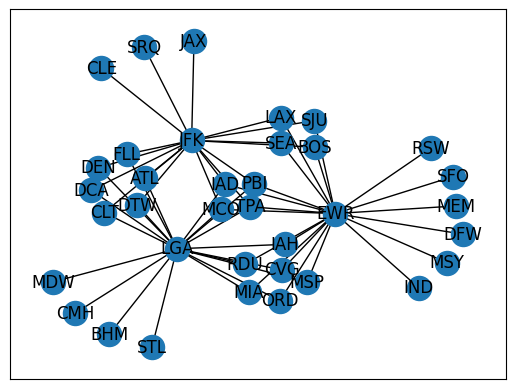

In [30]:
nx.draw_networkx(FG, with_labels=True) # Quick view of the Graph. As expected we see 3 very busy airports


In [31]:
nx.algorithms.degree_centrality(FG) # Notice the 3 airports from which all of our 100 rows of data originates
nx.density(FG) # Average edge density of the Graphs

0.09047619047619047

In [32]:
nx.average_shortest_path_length(FG) # Average shortest path length for ALL paths in the Graph

2.36984126984127

In [33]:
nx.average_degree_connectivity(FG) # For a node of degree k - What is the average of its neighbours' degree?

{20: 1.95, 1: 19.307692307692307, 2: 19.0625, 17: 2.0588235294117645, 3: 19.0}

In [34]:
# Let us find all the paths available
for path in nx.all_simple_paths(FG, source='JAX', target='DFW'):
 print(path)

['JAX', 'JFK', 'DEN', 'LGA', 'ORD', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'PBI', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'IAD', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'MIA', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'RDU', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'TPA', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'MSP', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'MCO', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'CVG', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'IAH', 'EWR', 'DFW']
['JAX', 'JFK', 'SEA', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'ORD', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'PBI', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'IAD', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'MIA', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'RDU', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'TPA', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'MSP', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'CVG', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'IAH', 'EWR', 'DFW']
['JAX', 'JFK',

In [35]:
# Let us find the dijkstra path from JAX to DFW.
# You can read more in-depth on how dijkstra works from this resource - https://courses.csail.mit.edu/6.006/fall11/lectures/lecture16.pdf
dijpath = nx.dijkstra_path(FG, source='JAX', target='DFW')
dijpath

['JAX', 'JFK', 'SEA', 'EWR', 'DFW']

In [36]:
# Let us try to find the dijkstra path weighted by airtime (approximate case)
shortpath = nx.dijkstra_path(FG, source='JAX', target='DFW', weight='air_time')
shortpath

['JAX', 'JFK', 'BOS', 'EWR', 'DFW']